# 1. Business Understanding

### 1.1 Problem statement


In Terry vs Ohio, a landmark Supreme Court case in 1967-8, the court found that a police officer was not in violation of the "unreasonable search and seizure" clause of the Fourth Amendment, even though he stopped and frisked a couple of suspects only because their behavior was suspicious. 
Thus Terry Stops , a temporary investigative detention of subjects under the speculation of "reasonable suspicion" .



### 1.2 Objectives

Build a classification model that predicts wheather a Terry Stop results in an arrest using observable stop characteristics at the real-time stops such as :
- The type of call made i.e Suspicion calls
- Time of day
- If a Frisk was done
- Subjects Gender
- Possesion of weapon by subject

### 1.3 Success Metrics

- Model is stable Performance and predictions
- Produces interpretable feature importance
- outlines relevant characteristics and reasons for a Terry Stop
- identifies time of day of Stop

### 1.4 Business Value

+ Help Law enforcement evaluate patterns leading to arrest
+ Improve Training program of officers
+ Data driven oversight judgements
+ Thin trancparency in arrests ,limiting discrimination

# 2. Data Understanding

This data represents records of police reported stops under Terry v. Ohio, 392 U.S. 1 (1968). Each row represents a unique stop.

- Each record contains perceived demographics of the subject, as reported by the officer making the stop and officer demographics as reported to the Seattle Police Department, for employment purposes.

- Data elements from the associated Computer Aided Dispatch (CAD) event (e.g. Call Type, Initial Call Type, Final Call Type) are included.


### 2.1 Dataset

The [Ohio Terry Traffic Stop dataset](Terry_Traffic_Stops.csv) is Sourced from the Seattle government state [website](https://data.seattle.gov/Public-Safety/Terry-Stops/28ny-9ts8/data_preview).  

### 2.2  Data Loading

In [156]:
import pandas as pd
df = pd.read_csv('Terry_Traffic_Stops.csv', low_memory=False)
df.head(10)

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Occurred Date
0,1 - 17,-1,20170000317010,301638,Arrest,NaN,7773,1978,Male,White,...,OBS - FIGHT - IP - PHYSICAL (NO WEAPONS),"ASSAULTS, OTHER",911,NORTH PCT 3RD W - B/N RELIEF,N,N,North,L,L3,2017-08-27T03:18:00
1,36 - 45,7727706299,20250000063255,63109655222,Field Contact,-,8974,1997,Female,White,...,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,NORTH PCT 2ND W - BOY (JOHN) - PLATOON 1,N,N,North,U,U2,2025-03-08T17:58:00
2,56 and Above,-1,20190000057245,532414,Arrest,NaN,8606,1965,Female,White,...,ASLT - WITH OR W/O WPNS (NO SHOOTINGS),"ASSAULTS, OTHER",911,TRAINING - FIELD TRAINING SQUAD,N,N,West,M,M3,2019-02-15T13:15:00
3,46 - 55,7729078044,20230000235837,51923259552,Field Contact,-,4494,1961,Male,White,...,DISTURBANCE,MISCHIEF OR NUISANCE - GENERAL,911,CRG - SQUAD 81D,N,Y,Southwest,W,W1,2023-08-16T20:31:00
4,46 - 55,7746702884,20210000151070,25601408632,Arrest,-,8696,1996,Male,White,...,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,WARRANT SERVICES - MISDEMEANOR,ONVIEW,NORTH PCT 3RD W - B/N RELIEF,Y,N,North,N,N2,2021-06-18T00:48:00
5,26 - 35,7752588737,20240000337534,61254189481,Offense Report,-,8584,1982,Male,White,...,BURG - COMM BURGLARY,WARRANT SERVICES - MISDEMEANOR,ONVIEW,SOUTH PCT 1ST W - SAM - PLATOON 2,N,N,South,O,O1,2024-11-30T05:20:00
6,-,31629429379,20220000039527,31629401025,Field Contact,Knife/Cutting/Stabbing Instrument,6885,1976,Male,Asian,...,DISTURBANCE,SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,ONVIEW,WEST PCT 2ND W - SPECIAL BEATS,N,Y,West,M,M2,2022-02-15T17:42:00
7,36 - 45,7734651928,20220000063270,32020344851,Field Contact,-,8582,1991,Male,White,...,ASSIST PUBLIC - NO WELFARE CHK OR DV ORDER SER...,DISTURBANCE - OTHER,ONVIEW,SOUTHWEST PCT 3RD W - WILLIAM - PLATOON 2,N,N,Southwest,W,W1,2022-03-13T22:49:00
8,26 - 35,-1,20170000003104,287417,Field Contact,NaN,7793,1986,Male,White,...,-,-,-,SOUTHWEST PCT 2ND W - SOUTHWEST BEATS,N,N,-,-,-,2017-07-19T18:05:00
9,36 - 45,33480861496,20240000257590,58918623150,Field Contact,-,7614,1978,Male,Two or More Races,...,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,NARCOTICS - MARIJUANA PUBLIC USE(NOT DISPENSARY),ONVIEW,WEST PCT 2ND W - DAVID - PLATOON 2,N,N,Southwest,F,F2,2024-09-10T14:55:00


In [157]:
df.info()               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66436 entries, 0 to 66435
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         66436 non-null  object
 1   Subject ID                66436 non-null  int64 
 2   GO / SC Num               66436 non-null  int64 
 3   Terry Stop ID             66436 non-null  int64 
 4   Stop Resolution           66436 non-null  object
 5   Weapon Type               33871 non-null  object
 6   Officer ID                66436 non-null  object
 7   Officer YOB               66436 non-null  int64 
 8   Officer Gender            66436 non-null  object
 9   Officer Race              66436 non-null  object
 10  Subject Perceived Race    66436 non-null  object
 11  Subject Perceived Gender  66436 non-null  object
 12  Reported Date             66436 non-null  object
 13  Initial Call Type         66436 non-null  object
 14  Final Call Type       

### 2.3 Data Evaluation Observations

- Dataset has 23 columns and 66436 rows where the following colums are to be involved
  1. Arrest Flag - target variable
  2. Frisk Flag
  3. Weapon Type
  4. Occurred Date 
  5. Final Call Type
  6. Subject Perceived Race
  7. Subject Percieved Gender




  

# 3. Data Preparation

### 3.1 Import Libraries

In [158]:
# import necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score ,roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import SMOTE




 

### 3.2 Feature Engineering

#### 3.2.1 Dropping

In [159]:
# Dropping irrelevant columns

# Involved columns
involved_cols = [
  'Final Call Type',
  'Occurred Date', 
  'Subject Perceived Race',
  'Frisk Flag',
  'Subject Perceived Gender',
  'Weapon Type',
  'Arrest Flag'

]

df = df[involved_cols]


#### 3.2.2 Frisk Flag

In [160]:
# Replacing missing values in 'Frisk Flag' column with 'N'
df['Frisk Flag'] = df['Frisk Flag'].replace('-', 'N')






#### 3.2.3 Weapon Types

In [161]:
# Grouping weapon types 
def group_weapon_types(x):
    if x in ['-', 'None/Not Applicable', 'Null']:
        return 'None'
    elif x in ['Handgun', 'Firearm', 'Firearm Other', 'Other Firearm', 'Firearm (unk type)', 'Rifle', 'Shotgun', 'Automatic Handgun']:
        return 'Firearm'
    elif x in ['Knife/Cutting/Stabbing Instrument', 'Lethal Cutting Instrument' ]:
        return 'Knife'
    elif x in ['Blunt Object/Striking Implement', 'Club, Blackjack, Brass Knuckles', 'Club', 'Brass Knuckles', 'Blackjack' ]:
        return 'Impact Weapon'
    elif x in ['Mace/Pepper Spray', 'Taser/Stun Gun', 'Personal Weapons (hands, feet, etc.)']:
        return 'Personal Weapons'
    elif x in ['Fire/Incendiary Device', 'Poison']:
        return 'Hazardous Weapons' 
    else:
        return 'None'
   

df['Weapon Type'] = df['Weapon Type'].apply(group_weapon_types)       

#### 3.2.4 Time of Stop

In [162]:
# Grouping Time of Day into time blocks
## Convert 'Occurred Date' to datetime and extract hour
df['Occurred Date'] = pd.to_datetime(df['Occurred Date'])
Time_of_Day = df['Occurred Date'].dt.hour

## Define function to group hours into time blocks
def group_time_of_day(x):
    if 5 <= x < 12:
        return 'Morning'
    elif 12 <= x < 17:
        return 'Afternoon'
    elif 17 <= x < 21:
        return 'Evening'
    else:
        return 'Night'  
    
df['Time Block'] = Time_of_Day.apply(group_time_of_day)  

# drop Occured Date with
df = df.drop('Occurred Date', axis=1)

#### 3.2.5 Type of CAD Call made

In [163]:
# Suspicion Calls
df['Suspicion Calls'] = df['Final Call Type'].str.contains('Suspicious', case=False, na=False).astype(int)

# 1 = suspicion related call, 0 = non-suspicion related call

# Drop 'Final Call Type' column 
df = df.drop('Final Call Type', axis=1)

#### 3.2.6 Subjects Race

In [164]:
# Collective uknown races
df['Subject Perceived Race'] = df['Subject Perceived Race'].replace(['Unknown', '-', 'Other', 'Multi-Racial', 'MULTIPLE SUBJECTS'], 'Unidentified')

#### 3.2.7 Subject Gender 

In [165]:
# drop other gender than male or female
def Genders(x):
    if x in ['Male', 'Female']:
        return x
    else:
        return 'None'

df['Subject Perceived Gender'] = df['Subject Perceived Gender'].apply(Genders)
# drop None row
df = df[df['Subject Perceived Gender'] != 'None']


#### 3.2.8 OneHot encoding

In [166]:
# one-hot encoding for Frisk Flag , Subject Percieved Gender and  Weapon Type
df['Frisk Flag'] = df['Frisk Flag'].map({'Y': 1, 'N': 0})
df['Arrest Flag'] = df['Arrest Flag'].map({'Y': 1, 'N': 0})
df['Subject Perceived Gender'] = df['Subject Perceived Gender'].map({'Male': 1, 'Female': 0})

# 4. Modeling

### 4.1 Likelihood of weapon possesion

#### 4.1.1 By Race

In [167]:
Weapon_present = df['Weapon Type'].apply(lambda x: 0 if x == 'None' else 1)
pd.crosstab(df['Subject Perceived Race'], Weapon_present, normalize='index') * 100

Weapon Type,0,1
Subject Perceived Race,,
American Indian or Alaska Native,94.570136,5.429864
Asian,94.009620,5.990380
Black or African American,93.817982,6.182018
Hispanic,94.110648,5.889352
Native Hawaiian or Other Pacific Islander,96.335079,3.664921
Unidentified,93.904762,6.095238
White,93.225108,6.774892


Out of 100 Subjects Stopped ; 
- 5  American Indian or Alaska Native
- 6  Asian
- 6  Black or African American
- 6  Hispanic
- 4  Native Hawaiian or Other Pacific Islander
- 7  White



Might have weapons



#### 4.1.2 By Gender

In [168]:
pd.crosstab(df['Subject Perceived Gender'],Weapon_present, normalize='index') * 100

Weapon Type,0,1
Subject Perceived Gender,,
0,97.375764,2.624236
1,92.616130,7.383870


Possibility of a Subject Stopped possesing a weapon is:
  - Male   - 7%
  - Female - 3%

### 4.2 Regression Model

#### 4.2.1 Features selection


In [169]:
features = ['Suspicion Calls','Time Block', 'Frisk Flag', 'Subject Perceived Gender', 'Weapon Type']
X = df[features]
y = df['Arrest Flag']

#### 4.2.2 Encoding

In [170]:
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)




#### 4.2.3 Train-Test Split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=44)

In [172]:
sm = SMOTE(random_state=44)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
print("Original dataset shape:", X_train.shape, y_train.shape)  
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)

Original dataset shape: (49244, 11) (49244,)
Resampled dataset shape: (87050, 11) (87050,)


#### 4.2.4 Logistic Regression Model

In [173]:
# initialize and fit logistic regression model
Log_model = LogisticRegression()


Log_model.fit(X_resampled, y_resampled)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [174]:
# predict probabilities and classes
y_pred = Log_model.predict(X_test)  
y_prob = Log_model.predict_proba(X_test)[:, 1]

##### Evaluation of Metrics

In [175]:
# confusion matrix 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# metrics report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[8300 6209]
 [ 690 1216]]
Accuracy: 0.5797136765153823
Precision: 0.16377104377104376
Recall: 0.6379853095487933
F1 Score: 0.2606365877183582
ROC-AUC Score: 0.6537195279956857


In [176]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': Log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(coefficients)

                          Feature  Coefficient
1                      Frisk Flag     0.491137
10   Weapon Type_Personal Weapons     0.343934
2        Subject Perceived Gender     0.203889
7       Weapon Type_Impact Weapon     0.143399
4              Time Block_Morning     0.106516
6   Weapon Type_Hazardous Weapons     0.010048
5                Time Block_Night    -0.118021
3              Time Block_Evening    -0.226931
8               Weapon Type_Knife    -0.417771
9                Weapon Type_None    -0.818133
0                 Suspicion Calls    -2.457816


- Subject gender , Weapons possesion and Frisk done had a positive relationship toward Arrest
- Suspicion calls had a negative relationship towards Arrest 
- Suspicion calls in Evening and Night resulted to no Arrest
- An ROC-AUC score of 65% is relatively efficient in predicting probabilities y_prob

### 4.3 Decision Tree Model

In [177]:
# train decision tree model
tree_model = DecisionTreeClassifier(max_depth=10, min_samples_split=20, min_samples_leaf=10, random_state=44)
tree_model.fit(X_resampled, y_resampled)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",20
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",10
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",44
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [178]:
# Predictions
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

In [179]:
# confusion matrix 
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

# metrics report
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_tree))


Confusion Matrix:
 [[8455 6054]
 [ 706 1200]]
Accuracy: 0.5881815412732257
Precision: 0.1654259718775848
Recall: 0.6295907660020986
F1 Score: 0.26200873362445415
ROC-AUC Score: 0.6545406885345326


In [180]:
# feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)
print("Training Accuracy:",tree_model.score(X_train, y_train))
print("Testing Accuracy:",tree_model.score(X_test, y_test))

                          Feature  Importance
0                 Suspicion Calls    0.625735
1                      Frisk Flag    0.206763
9                Weapon Type_None    0.085553
4              Time Block_Morning    0.029257
2        Subject Perceived Gender    0.022546
3              Time Block_Evening    0.011558
8               Weapon Type_Knife    0.008335
5                Time Block_Night    0.006738
7       Weapon Type_Impact Weapon    0.002291
10   Weapon Type_Personal Weapons    0.001218
6   Weapon Type_Hazardous Weapons    0.000004
Training Accuracy: 0.5863049305499147
Testing Accuracy: 0.5881815412732257


In [181]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

auc_log = roc_auc_score(y_test, y_prob)
auc_tree = roc_auc_score(y_test, y_prob_tree)

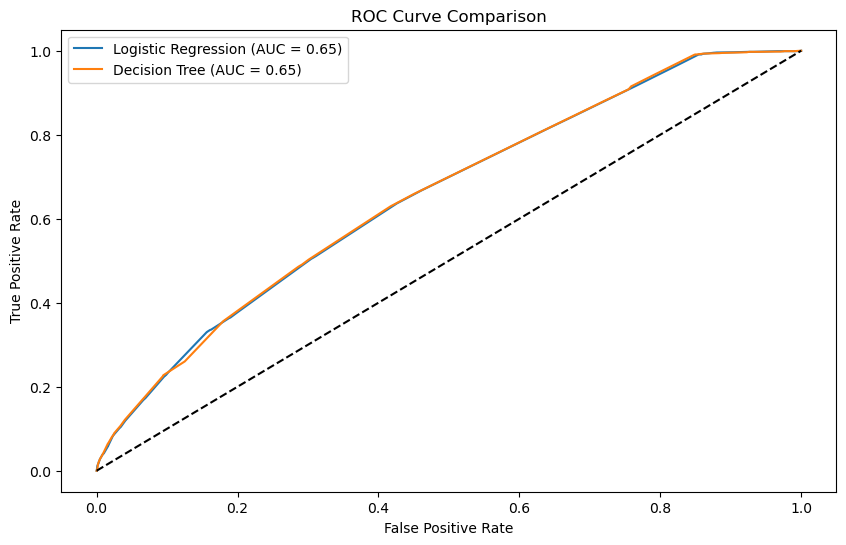

In [182]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# 5. Interpretation


The Accuracy Paradox; Initial models achieved ~88% accuracy but failed to identify a single arrest due to severe class imbalance. This was corrected using class balancing techniques (SMOTE / Class Weights).

The Performance Ceiling;  Both Logistic Regression and Decision Tree models capped at an ROC-AUC score 0.65, indicating that the initial feature set does not contain enough complex information to push past a moderate predictive threshold. This is despite inclusion of relevant features to predictions in the model.

Summatively , a conclusion that the nature of the dataset (data collected fully relied on human integrity , subjective to flaws) the Models satisfied their purpose in performance .

